In [105]:
import pandas as pd
df=pd.read_csv('diabetes.csv')

In [106]:
try:
    import scikeras
except ImportError:
    !python -m pip install scikeras

In [107]:
import warnings
from tensorflow import get_logger
get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore", message="Setting the random state for TF")

In [108]:
import numpy as np
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow import keras

In [110]:
from matplotlib import pyplot as plt

In [111]:
import seaborn as sns

In [113]:

import numpy as np

In [114]:

# Replacing 0 values 
df.Glucose = df.Glucose.replace(0,np.nan)
df.BloodPressure = df.BloodPressure.replace(0,np.nan)
df.SkinThickness = df.SkinThickness.replace(0,np.nan)
df.Insulin = df.Insulin.replace(0,np.nan)
df.BMI = df.BMI.replace(0,np.nan)

In [115]:

# Fill missing values with column means
df.Glucose = df.Glucose.fillna(df.Glucose.mean())
df.BloodPressure = df.BloodPressure.fillna(df.BloodPressure.mean())
df.SkinThickness = df.SkinThickness.fillna(df.SkinThickness.mean())
df.Insulin = df.Insulin.fillna(df.Insulin.mean())
df.BMI = df.BMI.fillna(df.BMI.mean())

In [116]:

# Standardize the data with scaling
from sklearn import preprocessing


In [117]:

df_scaled = preprocessing.scale(df)

In [118]:


# df needs to be converted back to pandas dataframe
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)


In [119]:

# Outcome should not be scaled as it is a binary classification
df_scaled['Outcome'] = df['Outcome']
df = df_scaled


In [123]:

# Train, test, split
from sklearn.model_selection import train_test_split

In [124]:

X=df.loc[:,df.columns!='Outcome']
y=df.loc[:,'Outcome']

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


**How to Tune Learning Rate, Batch Size, Number of Epochs and Neurons**

In [139]:
def create_model(neurons):
 # create model
 model = Sequential()
 model.add(Dense(neurons, input_shape=(8,), activation='relu'))
 model.add(Dense(1, activation='sigmoid'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [141]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [20, 40, 100]
epochs = [10, 50, 100]
neurons = [12, 32, 64]
learn_rate = [0.001, 0.01, 0.1]
param_grid = dict(batch_size=batch_size, epochs=epochs,model__neurons=neurons,optimizer__learning_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.763861 using {'batch_size': 100, 'epochs': 50, 'model__neurons': 64, 'optimizer__learning_rate': 0.1}


**Final Implementation**

In [142]:

from keras.models import Sequential
model = Sequential()

In [143]:

from keras.layers import Dense

In [144]:

# First hidden layer
model.add(Dense(64, input_shape=(8,), activation='relu'))

In [145]:

# Output layer
model.add(Dense(1,activation='sigmoid'))

In [146]:
opt = keras.optimizers.Adam(learning_rate=0.1)

In [147]:
# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [148]:

# Training for 100 epochs
model.fit(X_train,y_train,epochs=100,batch_size=50)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.6971
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7410
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7687
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.7785
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.7801
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7899
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7785
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7720
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.7801
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.7915
Epoch 11/

In [149]:
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.8713
Training Accuracy: 87.13%

5/5 [==============================] - 0s 4ms/step - loss: 1.7709 - accuracy: 0.7208
Testing Accuracy: 72.08%



**Confusion Matrix**

In [150]:

from sklearn.metrics import confusion_matrix

5/5 [==============================] - 0s 2ms/step


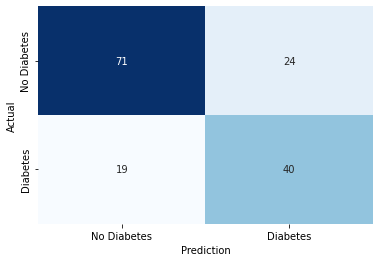

In [151]:

y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test,y_test_pred)
ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

**Classification Report**

In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        95
           1       0.62      0.68      0.65        59

    accuracy                           0.72       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154

